In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

In [122]:
file_name_1 = 'DWL_USGS_Sites/Malletts_Creek_Discharge'
var_1 = 'Mean_CFS'
file_name_2 = 'DWL_USGS_Sites/Malletts_Creek_Elevation'
var_2 = 'Gage_Height'
site_name = 'Malletts Creek'

# file_name_1 = 'DWL_USGS_Sites/Huron_River_Discharge'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Huron_River_Elevation'
# var_2 = 'Gage_Height'
# site_name = 'Huron River AA'

# file_name_1 = 'DWL_USGS_Sites/Allen_Creek_Discharge_1'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Allen_Creek_Elevation'
# var_2 = 'Gage_Height'
# site_name = 'Allen Creek'

# file_name_1 = 'DWL_USGS_Sites/Mill_Creek_Discharge'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Mill_Creek_Elevation_1'
# var_2 = 'Gage_Height'
# site_name = 'Mill Creek'

# file_name_1 = 'DWL_USGS_Sites/Huron_River_Hamburg_Discharge'
# var_1 = 'Mean_CFS'
# file_name_2 = 'DWL_USGS_Sites/Huron_River_Hamburg_Elevation'
# var_2 = 'Gage_Height'
# site_name = 'Huron River Hamburg'

In [123]:
def DWL_CCDF_df(file_name, var):
    
    df = pd.read_csv(file_name+".csv")
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    time_period_data = df

    sorted_data = time_period_data.sort_values(var, ascending=False)

    time_period_data['ranked_column_m'] = sorted_data[var].rank(method='first', ascending=False)

    df['numbered_col'] = range(1, len(df) + 1)
    
    print("ranked column m:", time_period_data['ranked_column_m'].head())

    n = len(time_period_data)

    df['P_Value'] = range(1, len(df) + 1)

    time_period_data['P_Value'] = (time_period_data['ranked_column_m'] / (n + 1)) * 100
    print(time_period_data['P_Value'])
    # df = august_data
    # return df
    return(time_period_data)

In [124]:
def DWL_plotTimeSeries(file_name, var):

    df = pd.read_csv(file_name+".csv")
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    # Plot the time series
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df['Datetime'], df[var], marker='o', linestyle='-')

    plt.title('Time Series Plot of ' + file_name)
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.grid(True)

    return plt.show()

ranked column m: 5598    2159.0
5599    1395.0
5600    2269.0
5601    2824.0
5602    2994.0
Name: ranked_column_m, dtype: float64
5598    59.640884
5599    38.535912
5600    62.679558
5601    78.011050
5602    82.707182
          ...    
9212    11.602210
9213    21.795580
9214    42.320442
9215    41.491713
9216    53.508287
Name: P_Value, Length: 3619, dtype: float64


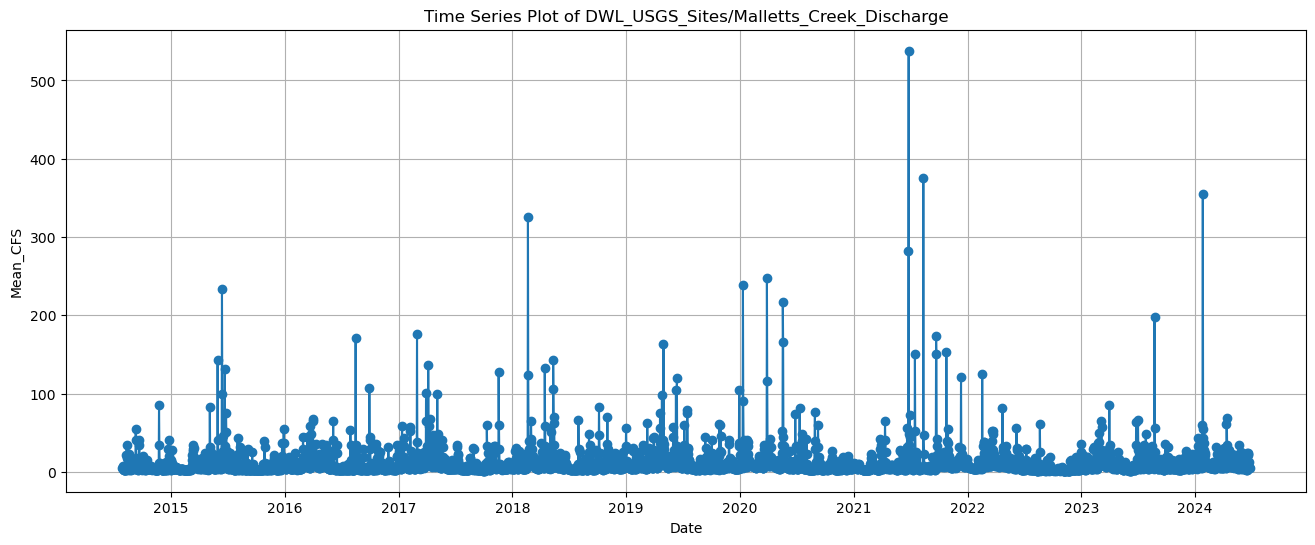

max_col_mean value is: 538.0
ranked column m: 0    233702.0
1    233878.0
2    233840.0
3    234168.0
4    233855.0
Name: ranked_column_m, dtype: float64
0         99.783101
1         99.858247
2         99.842022
3         99.982067
4         99.848427
            ...    
234204    28.299389
234205    28.299816
234206    28.300243
234207    28.300670
234208    29.293369
Name: P_Value, Length: 234209, dtype: float64


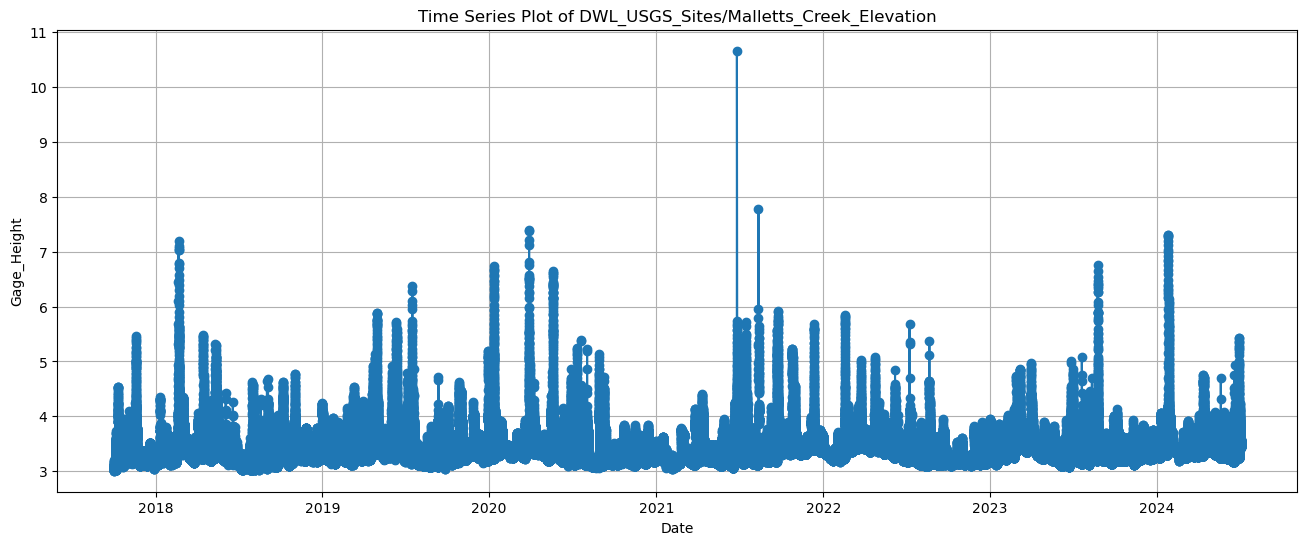

max_col_ele value is: 10.66
DataFrame 1:
     agency_cd  site_no   Datetime  Mean_CFS 71316_00060_00003_cd  \
6758      USGS  4174518 2017-10-01      1.49                    A   
6759      USGS  4174518 2017-10-02      1.56                    A   
6760      USGS  4174518 2017-10-03      1.71                    A   
6761      USGS  4174518 2017-10-04      2.41                    A   
6762      USGS  4174518 2017-10-05      1.44                    A   

      ranked_column_m  numbered_col    P_Value  
6758           3608.0          1161  99.668508  
6759           3600.0          1162  99.447514  
6760           3563.0          1163  98.425414  
6761           3312.0          1164  91.491713  
6762           3615.0          1165  99.861878  

DataFrame 2:
  agency_cd  site_no            Datetime tz_cd  Gage_Height 281748_00065_cd  \
0      USGS  4174518 2017-10-01 00:00:00   EST         3.05               A   
1      USGS  4174518 2017-10-01 00:15:00   EST         3.04               A   

In [125]:
df1 = DWL_CCDF_df(file_name = file_name_1, var = var_1)
DWL_plotTimeSeries(file_name = file_name_1, var = var_1)

# these values needed for finding the range to normalize plots
max_col_mean = df1['Mean_CFS'].max()
min_col_mean = df1['Mean_CFS'].min()
range_1 = max_col_mean - min_col_mean
print("max_col_mean value is: " + str(max_col_mean))

df2 = DWL_CCDF_df(file_name = file_name_2, var = var_2)
DWL_plotTimeSeries(file_name = file_name_2, var = var_2)

# these values needed for finding the range to normalize plots
max_col_ele = df2['Gage_Height'].max()
min_col_ele = df2['Gage_Height'].min()
range_2 = max_col_ele - min_col_ele
print("max_col_ele value is: " + str(max_col_ele))

# Determine the more recent stopping date
max_date = max(df1['Datetime'].max(), df2['Datetime'].max())

# Slice dataframes to include only rows up to max_date
# df1 = df1[df1['Datetime'] <= max_date]
# df2 = df2[df2['Datetime'] <= max_date]

# Find intersection of date ranges
start_date = max(df1['Datetime'].min(), df2['Datetime'].min())
end_date = min(df1['Datetime'].max(), df2['Datetime'].max())

# Filter both dataframes to intersecting date range
df1 = df1[(df1['Datetime'] >= start_date) & (df1['Datetime'] <= end_date)]
df2 = df2[(df2['Datetime'] >= start_date) & (df2['Datetime'] <= end_date)]

print("DataFrame 1:")
print(df1.head())
print("\nDataFrame 2:")
print(df2.head())

print("DataFrame 1:")
print(df1.tail())
print("\nDataFrame 2:")
print(df2.tail())

Yeah it does, also if the elbows are before the 10% then it might also not matter as much. What would be really cool is if you could highlight in the time series for both discharge and elevation, the time steps where the discharge is at the p=10% value (plus or minus 2% so hopefully the highlight stand out better) and then on separate time series of disacharge and elevation, then times when the elevation was at that p = 10% because then if the time steps are still the same, then I’d say they’re interchangeable

In [126]:
p_value = []

In [127]:
def DWL_CCDF_plot_P(df, x, y, P, file_name, p_value):
    df_sorted = df.sort_values(by='P_Value')

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df_sorted[x], df_sorted[y], marker='o', linestyle='-')

    # Interpolate the y-value where P_Value = 50
    #p_value = P
    if P in df_sorted[x].values:
        intersection_y = df_sorted[df_sorted[x] == P][y].values[0]
    else:
        intersection_y = np.interp(P, df_sorted[x], df_sorted[y])

    if P == 12:
        p_value.append(intersection_y)

    # Plot vertical line at P_Value = 50
    ax.axvline(x=P, color='blue', linestyle='--')

    # Add a horizontal line at the intersection point
    ax.axhline(y=intersection_y, color='green', linestyle='--')

    # Annotate the intersection point
    if y == 'Mean_CFS':
        ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + 5),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')
    
    if y == 'Gage_Height':
        ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + .1),
                    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')

    # Add scatter plot for individual points
    # ax.scatter(df_sorted[x], df_sorted[y], color='red')
    #plot scatter

    if y == 'Mean_CFS':
        plt.title('CCDF of DWL Site: ' + file_name + " for Mean Daily Flow with " + str(P) + " exceedance probability")
    if y == 'Gage_Height':
        plt.title('CCDF of DWL Site: ' + file_name + " for Gage Height with " + str(P) + " exceedance probability")

    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    
    if y == 'Mean_CFS':
        plt.ylabel('Mean Daily Flow (cfs)')
    if y == 'Gage_Height':
        plt.ylabel('Elevation/Gage Height (feet)')
    plt.grid(True)

In [128]:
def DWL_CCDF_Overlay(var_1, var_2, df1, df2, x, site_name):

    df1_sorted = df1.sort_values(by='P_Value')
    df2_sorted = df2.sort_values(by='P_Value')

    fig, ax1 = plt.subplots(figsize=(16, 6))

    # df1_sorted['Normal_Mean'] = (df1_sorted[var_1] / max_col_mean)
    # df2_sorted['Normal_Gage_Height'] = (df2_sorted[var_2] / max_col_ele)

    df1_sorted['Normal_Mean'] = (df1_sorted[var_1] - min_col_mean) /range_1
    df2_sorted['Normal_Gage_Height'] = (df2_sorted[var_2] - min_col_ele) /range_2


    color = 'tab:red'
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)')
    ax1.set_ylabel('Mean Daily Flow (cfs)', color=color)
    ax1.plot(df1_sorted[x], df1_sorted['Normal_Mean'], marker='o', linestyle='-', color = 'red')
    ax1.tick_params(axis='y', labelcolor=color)

    # ax1.set_xlim(0, 100)
    # ax1.set_ylim(0, 1)

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Elevation/Gage Height (feet)', color=color)  # we already handled the x-label with ax1
    ax2.plot(df2_sorted[x], df2_sorted['Normal_Gage_Height'], marker='o', linestyle='-') #, color = 'blue')
    ax2.tick_params(axis='y', labelcolor=color)

    # ax2.set_ylim(0, 1)

    plt.title('CCDFs of DWL Site: ' + site_name + " for Mean Daily Flow and Gage Height") 
    plt.grid(True)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


In [129]:
def DWL_CCDF_Overlay_Normalized(var_1, var_2, df1, df2, x, site_name, max_col_mean, max_col_ele):

    df1_sorted = df1.sort_values(by='P_Value')
    df2_sorted = df2.sort_values(by='P_Value')

    fig, ax = plt.subplots(figsize=(16, 6))

    # df1_sorted['Normal_Mean'] = (df1_sorted[var_1] / max_col_mean)
    # df2_sorted['Normal_Gage_Height'] = (df2_sorted[var_2] / max_col_ele)

    df1_sorted['Normal_Mean'] = (df1_sorted[var_1] - min_col_mean) /range_1
    df2_sorted['Normal_Gage_Height'] = (df2_sorted[var_2] - min_col_ele) /range_2
    

    # color = 'tab:red'
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)')
    ax.plot(df1_sorted[x], (df1_sorted['Normal_Mean']), marker='o', linestyle='-', color = 'red')
    # ax.tick_params(axis='y', labelcolor=color)


    # color = 'tab:blue'
    
    ax.plot(df2_sorted[x], df2_sorted['Normal_Gage_Height'], marker='o', linestyle='-') #, color = 'blue')
    # ax2.tick_params(axis='y', labelcolor=color)

    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1)

    plt.title('CCDFs of DWL Site: ' + site_name + " for Mean Daily Flow and Gage Height") 
    plt.grid(True)
    # fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


    # fig, ax = plt.subplots(figsize=(10, 6))
    # ax.plot(df['Date'], df['Value'], marker='o', linestyle='-')

    # df2 = removeErroneousData("001B")
    # ax.plot(df2['Date'], df2['Value'], marker='o', linestyle='-', color = 'orange')

    # plt.title('Time Series Plot')
    # plt.xlabel('Date')
    # plt.ylabel('Value')
    # plt.grid(True)

    # plt.show()

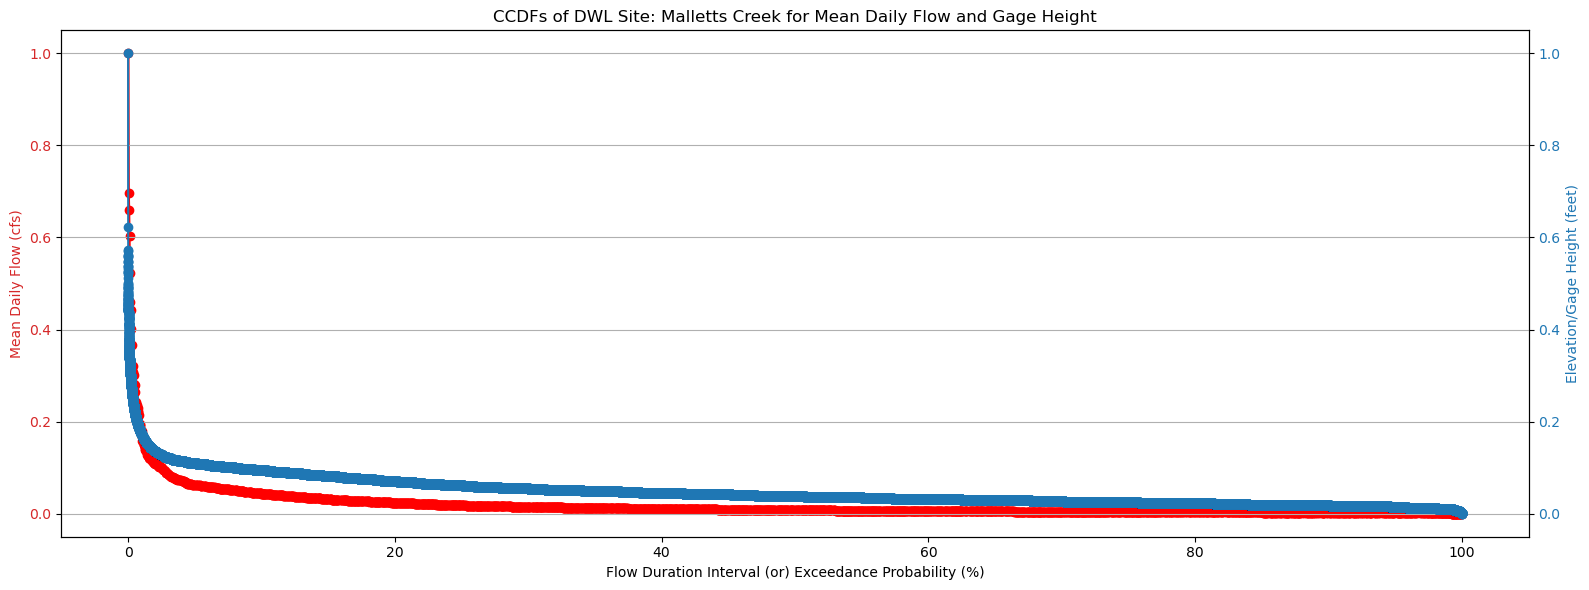

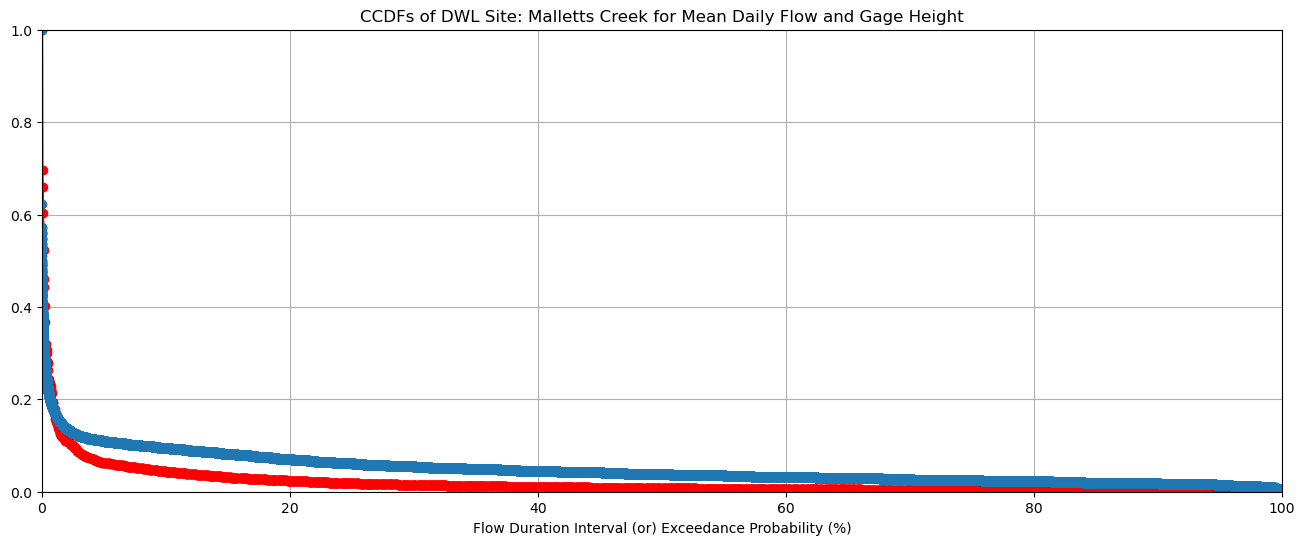

In [130]:
DWL_CCDF_Overlay(var_1, var_2, df1, df2, x = 'P_Value', site_name = site_name)
DWL_CCDF_Overlay_Normalized(var_1, var_2, df1, df2, x = 'P_Value', site_name = site_name, max_col_mean = max_col_mean, max_col_ele = max_col_ele)

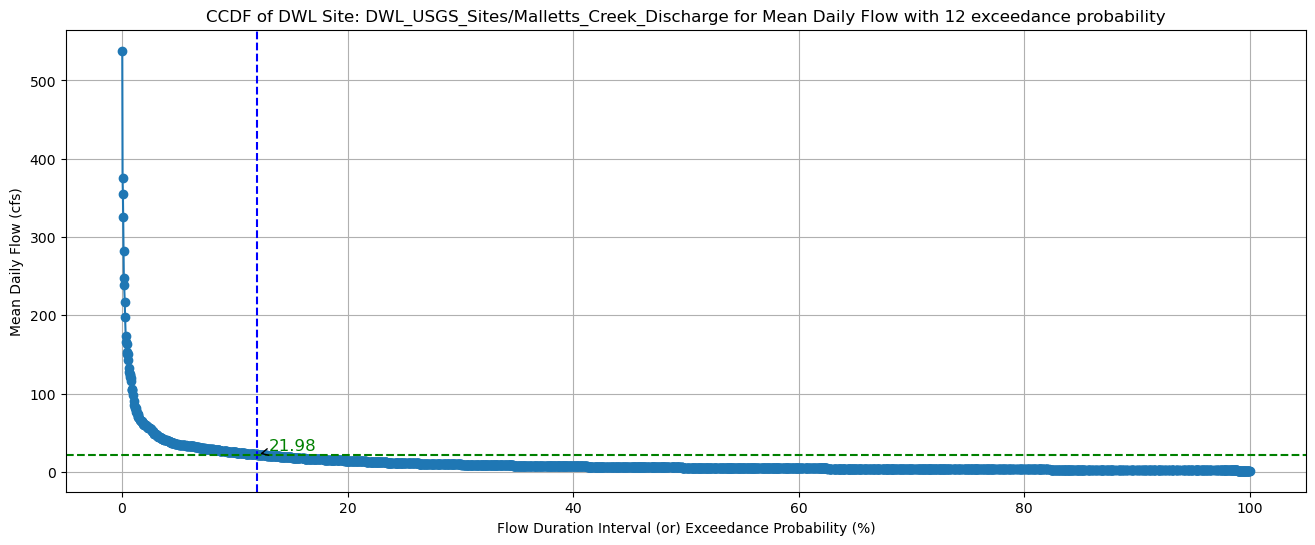

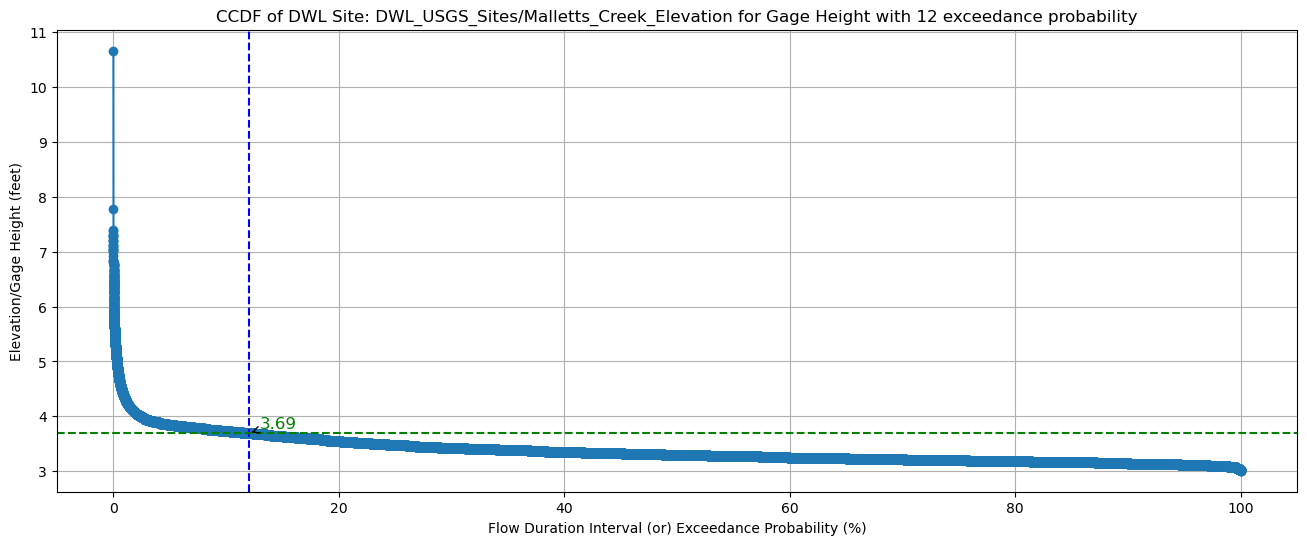

In [131]:
# df = DWL_plotTimeSeries(file_name, var)

# MALLETS CREEK:
# D: 21.904 - 28.7
# E: 3.77 - 3.69
P = 12
DWL_CCDF_plot_P(df = df1, x='P_Value', y= var_1, P=P, file_name = file_name_1, p_value = p_value)
DWL_CCDF_plot_P(df = df2, x='P_Value', y= var_2, P=P, file_name = file_name_2, p_value = p_value)

# DWL_CCDF_plot_P(df = df2, x='P_Value', y= var_2, P=10, file_name = file_name_2, P10_value = P10_value)

In [132]:
def DWL_plotTimeSeries_Highlighted_P10(df, file_name, var, output_csv, low, high):

    # df = pd.read_csv(file_name+".csv")
    # df['Datetime'] = pd.to_datetime(df['Datetime'])
    # df

    current_date = pd.Timestamp.now()
    ten_years_ago = current_date - pd.DateOffset(years=10)
    
    # Filter DataFrame for data in the last 10 years
    df = df[df['Datetime'] >= ten_years_ago]

    # Plot the time series
    fig, ax = plt.subplots(figsize=(30, 6))
    ax.plot(df['Datetime'], df[var], marker='o', linestyle='-')

    # Extract red colored points (gage height between 5 and 6)
    red_points = df[(df[var] >= low) & (df[var] <= high)].copy()
    
    # Save red points to CSV
    red_points.to_csv(output_csv, index=False)

     # Highlight points where gage height is between 5 and 6
    mask = (df[var] >= low) & (df[var] <= high)
    ax.scatter(df.loc[mask, 'Datetime'], df.loc[mask, var], color='red', label='Gage Height [5, 6]', zorder=5)

    plt.title('Time Series Plot of ' + file_name)
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.grid(True)

    return plt.show()

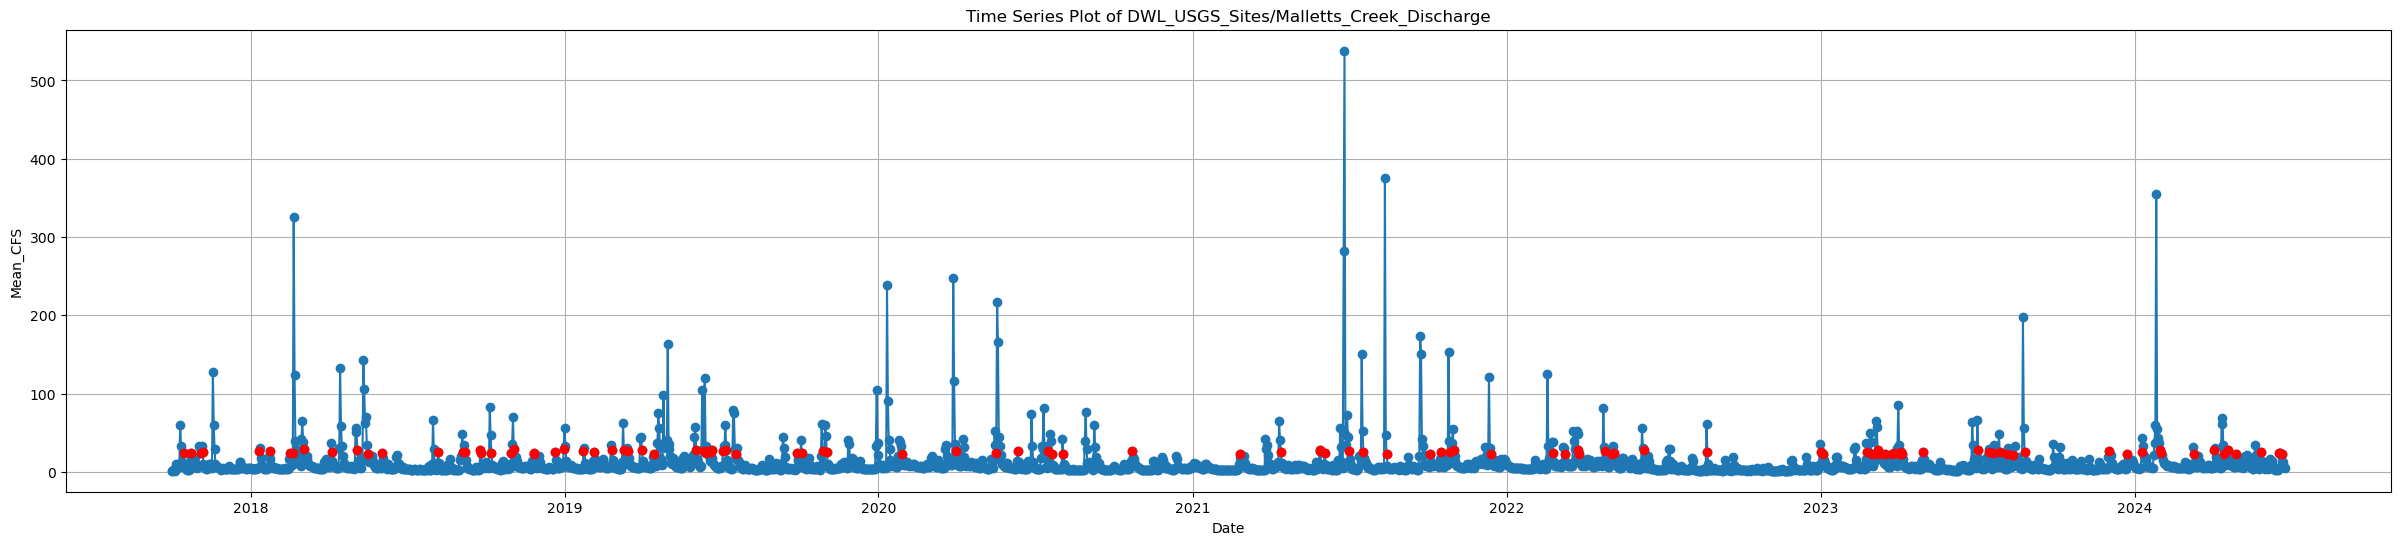

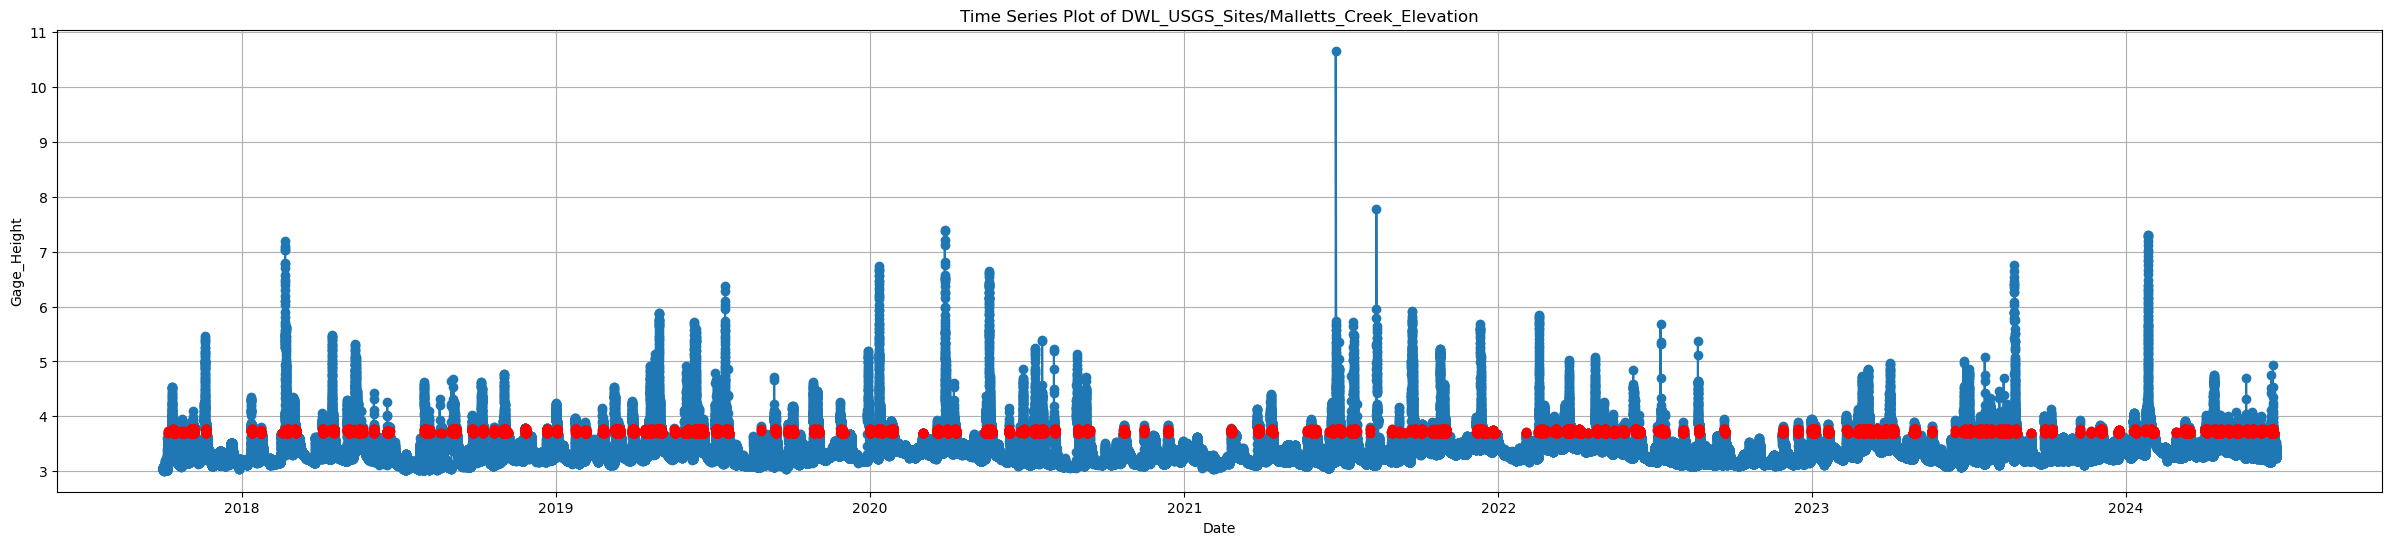

In [133]:
DWL_plotTimeSeries_Highlighted_P10(df = df1, file_name = file_name_1, var = var_1, output_csv='red_points_1.csv', low=21.99, high=28.73)
DWL_plotTimeSeries_Highlighted_P10(df = df2, file_name = file_name_2, var = var_2, output_csv='red_points_2.csv', low=3.69, high=3.77)

In [134]:
def plotting_red_points(red_file_1, red_file_2):

    # Load data from CSV files
    df1 = pd.read_csv(red_file_1 + '.csv')
    df2 = pd.read_csv(red_file_2 + '.csv')

    # Convert 'Datetime' columns to datetime objects
    df1['Datetime'] = pd.to_datetime(df1['Datetime'])
    df2['Datetime'] = pd.to_datetime(df2['Datetime'])

    # # Set 'Datetime' as index for both DataFrames
    # df1.set_index('Datetime', inplace=True)
    # df2.set_index('Datetime', inplace=True)

    # Extract necessary columns
    df1_mean_cfs = df1['Mean_CFS']
    df2_gage_height = df2['Gage_Height']

    '''
    # Extract necessary columns
    df1_mean_cfs = df1['Mean_CFS'].values.reshape(-1, 1)  # Reshape for MinMaxScaler
    df2_gage_height = df2['Gage_Height'].values.reshape(-1, 1)  # Reshape for MinMaxScaler

    # Normalize using Min-Max scaler
    scaler = MinMaxScaler()
    df1_mean_cfs_normalized = scaler.fit_transform(df1_mean_cfs)
    df2_gage_height_normalized = scaler.transform(df2_gage_height)
    '''

    df1_mean_cfs_max = df1['Mean_CFS'].max()
    df2_gage_height_max = df2['Gage_Height'].max()

    df1_mean_cfs_normalized = df1_mean_cfs / df1_mean_cfs_max
    df2_gage_height_normalized = df2_gage_height / df2_gage_height_max


    # Set up larger figure size
    plt.figure(figsize=(20, 6))  # Adjust size as needed

    # Plotting on the same axis
    # plt.plot(df1.index, df1_mean_cfs_normalized, label='Normalized Mean_CFS', color='blue')
    # plt.plot(df2.index, df2_gage_height_normalized, label='Normalized Gage_Height', color='red')

    # Plotting scatter plot
    plt.scatter(df1['Datetime'], df1_mean_cfs_normalized, label='Normalized Mean_CFS', color='blue', alpha=0.5)
    plt.scatter(df2['Datetime'], df2_gage_height_normalized, label='Normalized Gage_Height', color='red', alpha=0.5)

    # Add labels, title, legend, and grid
    plt.xlabel('Datetime')
    plt.ylabel('Normalized Values')
    plt.title('Normalized Mean_CFS and Gage_Height over Time')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
'''
    # Convert 'Datetime' columns to datetime objects
    df1['Datetime'] = pd.to_datetime(df1['Datetime'])
    df2['Datetime'] = pd.to_datetime(df2['Datetime'])

    # Set 'Datetime' as index for both DataFrames
    df1.set_index('Datetime', inplace=True)
    df2.set_index('Datetime', inplace=True)

    # Extract necessary columns
    df1_mean_cfs = df1['Mean_CFS']
    df2_gage_height = df2['Gage_Height']

    # Set up larger figure size
    plt.figure(figsize=(15, 6))  # Adjust size as needed

    # Plotting on the same axis
    plt.plot(df1_mean_cfs.index, df1_mean_cfs, label='Mean_CFS', color='blue')
    plt.plot(df2_gage_height.index, df2_gage_height, label='Gage_Height', color='red')

    # Add labels, title, legend, and grid
    plt.xlabel('Datetime')
    plt.ylabel('Values')
    plt.title('Mean_CFS and Gage_Height over Time')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    '''

"\n    # Convert 'Datetime' columns to datetime objects\n    df1['Datetime'] = pd.to_datetime(df1['Datetime'])\n    df2['Datetime'] = pd.to_datetime(df2['Datetime'])\n\n    # Set 'Datetime' as index for both DataFrames\n    df1.set_index('Datetime', inplace=True)\n    df2.set_index('Datetime', inplace=True)\n\n    # Extract necessary columns\n    df1_mean_cfs = df1['Mean_CFS']\n    df2_gage_height = df2['Gage_Height']\n\n    # Set up larger figure size\n    plt.figure(figsize=(15, 6))  # Adjust size as needed\n\n    # Plotting on the same axis\n    plt.plot(df1_mean_cfs.index, df1_mean_cfs, label='Mean_CFS', color='blue')\n    plt.plot(df2_gage_height.index, df2_gage_height, label='Gage_Height', color='red')\n\n    # Add labels, title, legend, and grid\n    plt.xlabel('Datetime')\n    plt.ylabel('Values')\n    plt.title('Mean_CFS and Gage_Height over Time')\n    plt.legend()\n    plt.grid(True)\n\n    plt.tight_layout()\n    plt.show()\n    "

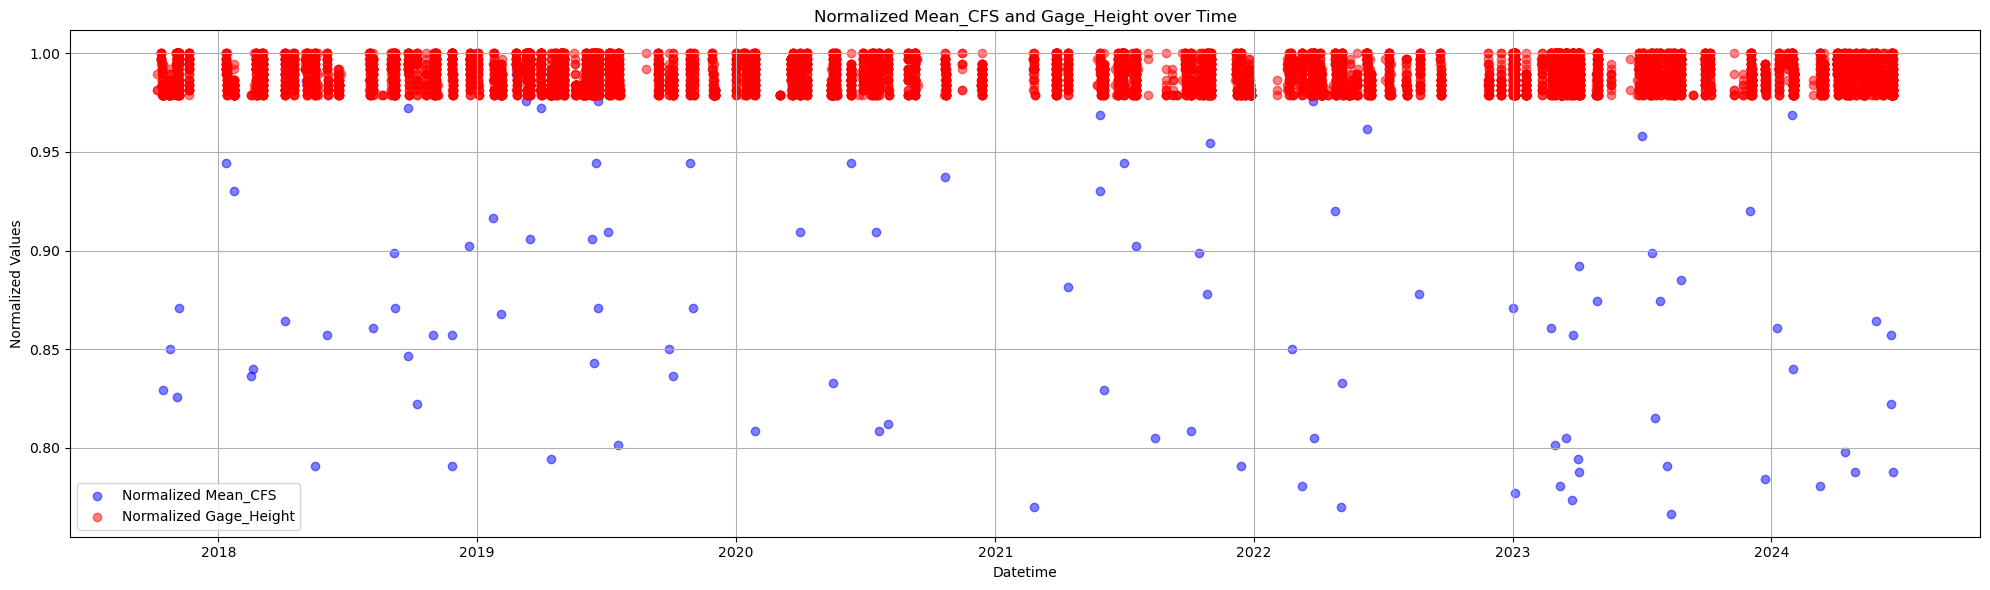

In [135]:
plotting_red_points('red_points_1', 'red_points_2')